<a href="https://colab.research.google.com/github/Falconly/kaggle/blob/main/Apple%20Quality/apple_quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

from tensorflow import keras
from tensorflow.keras.layers import Dense

In [2]:
upload = files.upload()

Saving apple_quality.csv to apple_quality.csv


In [26]:
apple_quality = pd.read_csv('apple_quality.csv')

In [27]:
apple_quality.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [28]:
apple_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [29]:
apple_quality.shape

(4001, 9)

In [30]:
apple_quality.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


<Axes: xlabel='count', ylabel='Quality'>

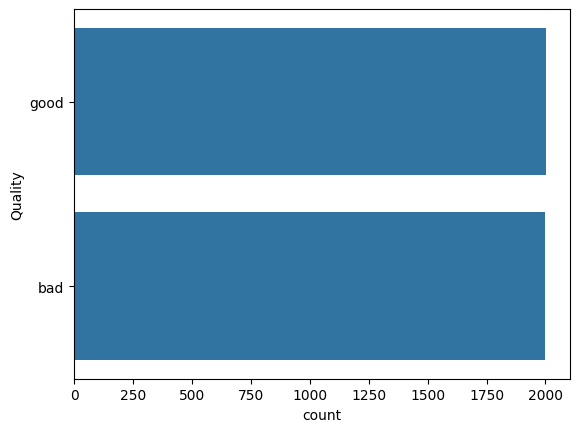

In [31]:
sns.countplot(apple_quality.Quality)

In [32]:
apple_quality.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [43]:
apple_quality['Acidity']

0                            -0.491590483
1                            -0.722809367
2                             2.621636473
3                             0.790723217
4                             0.501984036
                      ...                
3996                          1.854235285
3997                         -1.334611391
3998                         -2.229719806
3999                          1.599796456
4000    Created_by_Nidula_Elgiriyewithana
Name: Acidity, Length: 4001, dtype: object

In [45]:
apple_quality.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [48]:
apple_quality.drop(4000, inplace=True)

In [65]:
apple_quality.drop(columns='A_id', inplace=True)

In [52]:
apple_quality['Acidity'] = apple_quality['Acidity'].astype('float64')

In [53]:
apple_quality.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [78]:
le = LabelEncoder()
# good - 1, bad - 0
apple_quality['Quality'] = le.fit_transform(apple_quality['Quality'])

<Axes: >

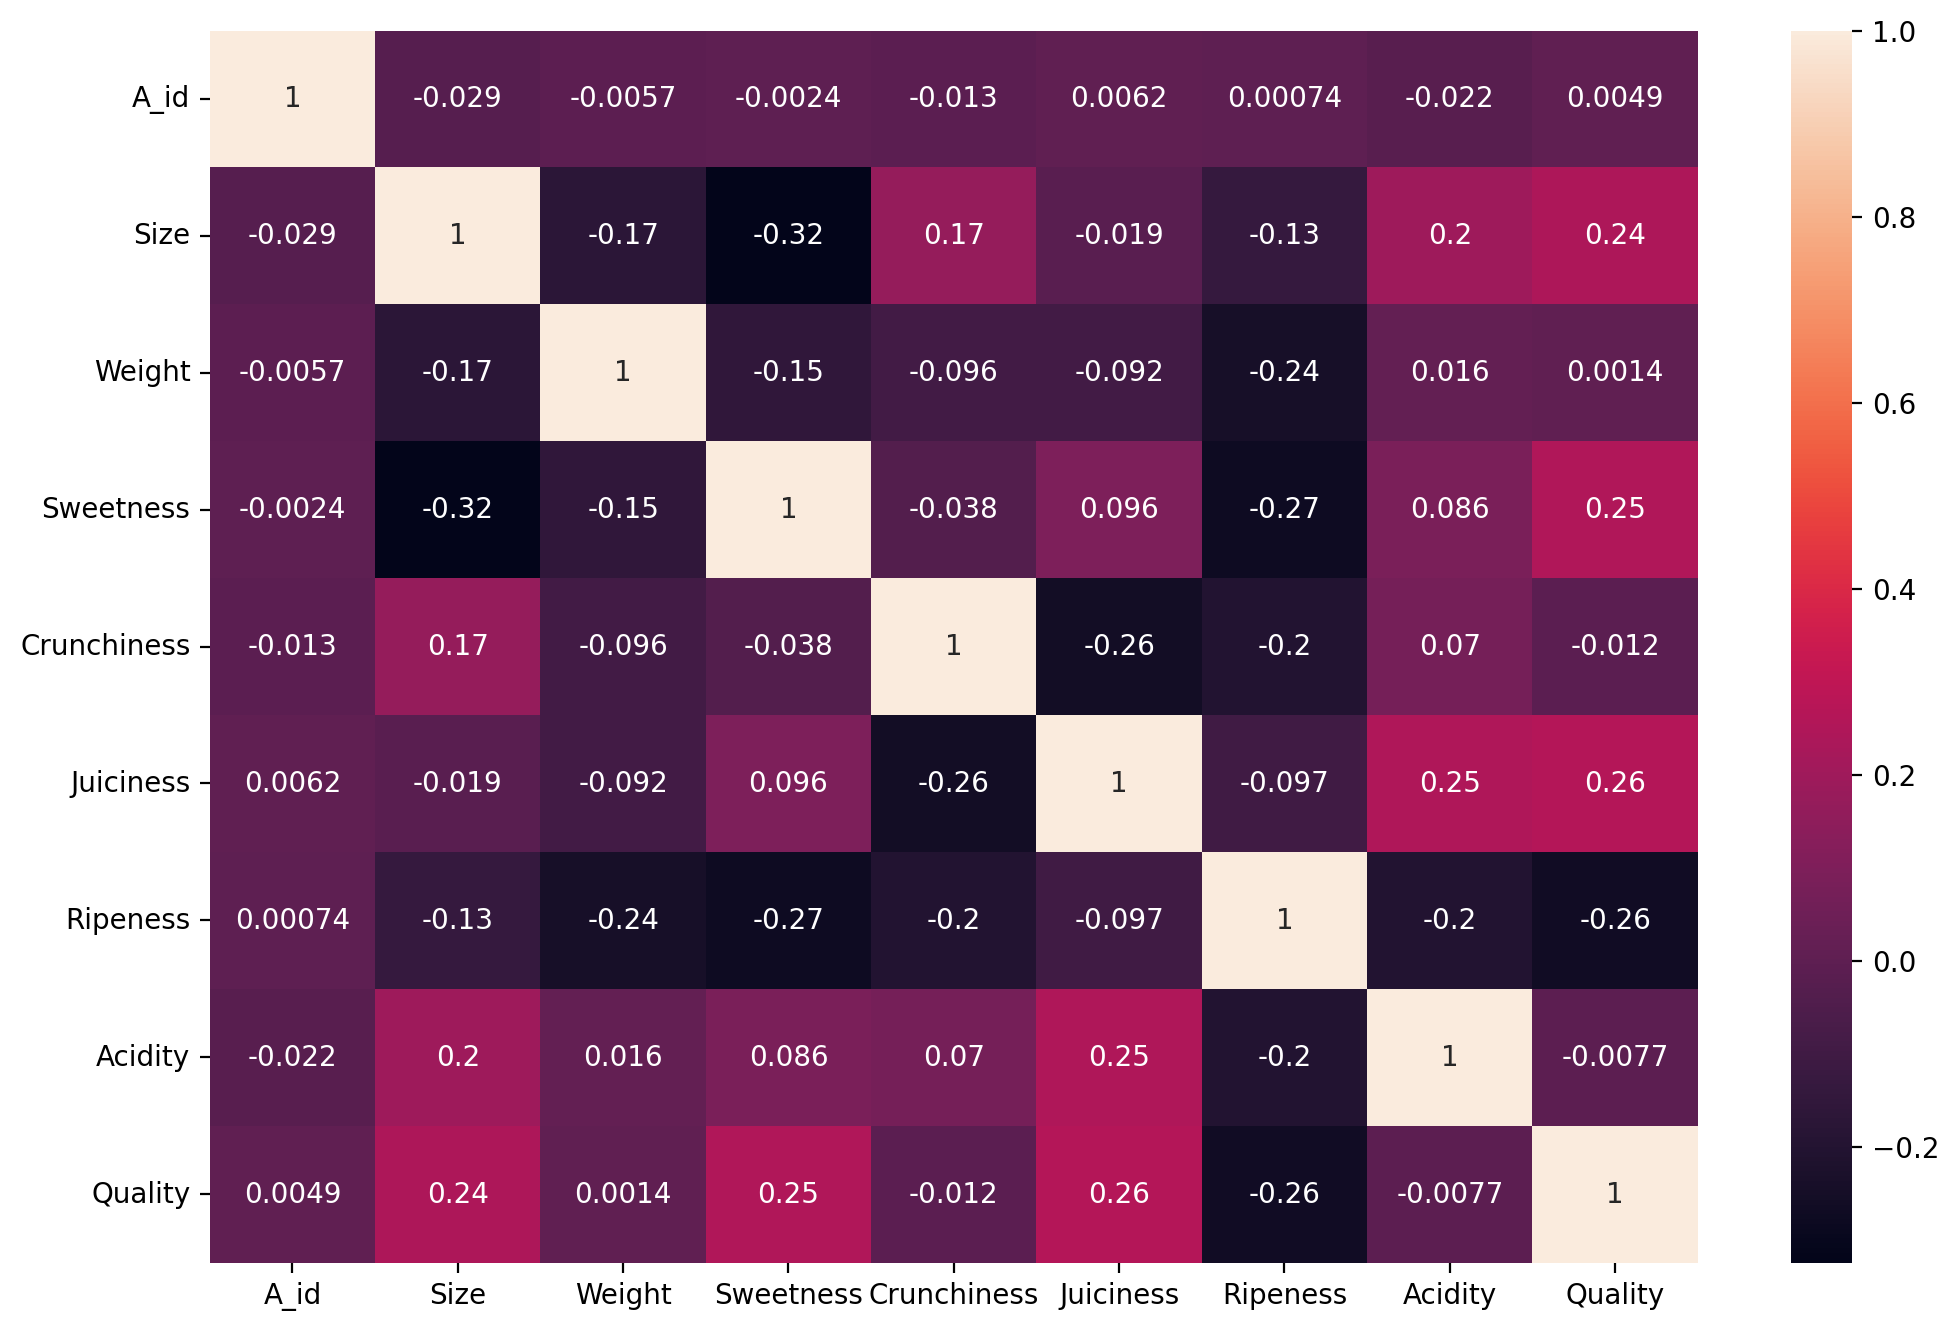

In [79]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(apple_copy.corr(), annot=True)

<Axes: xlabel='Size', ylabel='Density'>

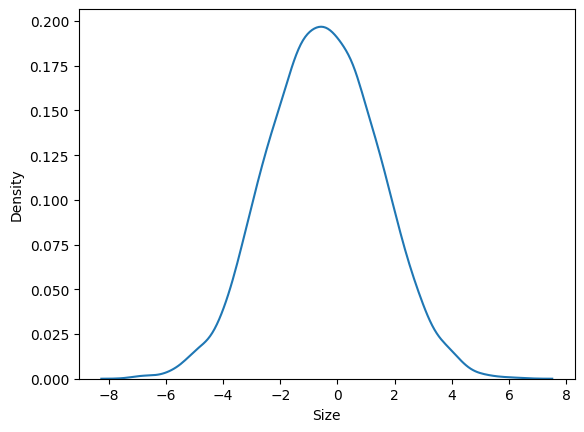

In [58]:
sns.kdeplot(apple_quality, x='Size')

In [68]:
for col in apple_quality.select_dtypes('float64').columns:
  print(f'{col}, ассиметрия: {apple_quality[col].skew()}, эксцесс: {apple_quality[col].kurt()}')

Size, ассиметрия: -0.0024369433916124265, эксцесс: -0.08334065839772187
Weight, ассиметрия: 0.003101570142725525, эксцесс: 0.3590498289188946
Sweetness, ассиметрия: 0.08384979089728131, эксцесс: 0.014472224432848346
Crunchiness, ассиметрия: 0.00023010591402162201, эксцесс: 0.7220204828975696
Juiciness, ассиметрия: -0.11342083348577094, эксцесс: 0.02873539531153213
Ripeness, ассиметрия: -0.008764097369532927, эксцесс: -0.07185020249958196
Acidity, ассиметрия: 0.05578345335267586, эксцесс: -0.09345141613095986


<Axes: xlabel='Weight', ylabel='Density'>

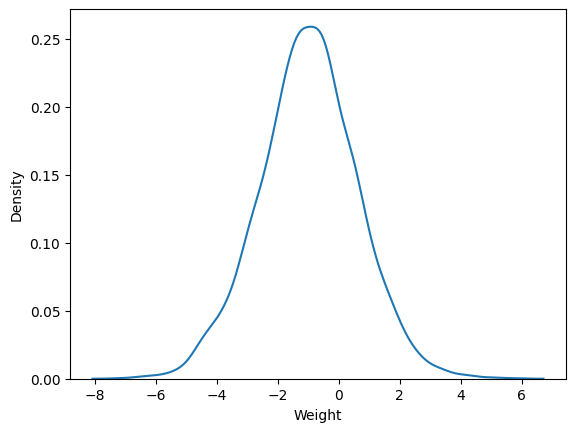

In [70]:
sns.kdeplot(apple_quality, x='Weight')

<Axes: xlabel='Crunchiness', ylabel='Density'>

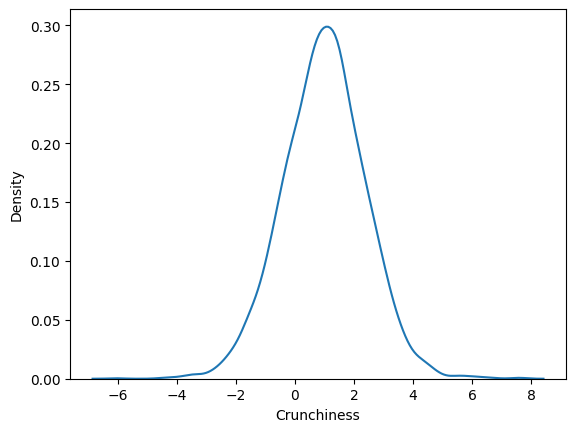

In [71]:
sns.kdeplot(apple_quality, x='Crunchiness')

In [80]:
X = apple_quality.drop(columns='Quality')
y = apple_quality.Quality

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# XGBoost


In [99]:
model = make_pipeline(StandardScaler(), XGBClassifier(tree_method='hist', device='cuda'))

In [100]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [101]:
predict = model.predict(X_test)

In [102]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       655
           1       0.89      0.88      0.88       665

    accuracy                           0.88      1320
   macro avg       0.88      0.88      0.88      1320
weighted avg       0.89      0.88      0.88      1320



In [103]:
model.score(X_test, y_test)

0.8848484848484849

# keras

In [104]:
# Стандартизация
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [186]:
model = keras.Sequential([Dense(120, input_dim=X_train.shape[1], activation='sigmoid'),
                          Dense(80, activation='sigmoid'),
                          Dense(60, activation='sigmoid'),
                          Dense(1, activation='sigmoid')])

In [187]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 120)               960       
                                                                 
 dense_30 (Dense)            (None, 80)                9680      
                                                                 
 dense_31 (Dense)            (None, 60)                4860      
                                                                 
 dense_32 (Dense)            (None, 1)                 61        
                                                                 
Total params: 15561 (60.79 KB)
Trainable params: 15561 (60.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [189]:
his = model.fit(X_train, y_train, batch_size=16, epochs=40)

Epoch 1/40
168/168 [==============================] - 3s 5ms/step - loss: 0.6445 - accuracy: 0.6269
Epoch 2/40
168/168 [==============================] - 1s 5ms/step - loss: 0.5347 - accuracy: 0.7306
Epoch 3/40
168/168 [==============================] - 1s 4ms/step - loss: 0.5163 - accuracy: 0.7493
Epoch 4/40
168/168 [==============================] - 1s 4ms/step - loss: 0.5114 - accuracy: 0.7466
Epoch 5/40
168/168 [==============================] - 1s 5ms/step - loss: 0.5038 - accuracy: 0.7493
Epoch 6/40
168/168 [==============================] - 1s 7ms/step - loss: 0.4973 - accuracy: 0.7586
Epoch 7/40
168/168 [==============================] - 2s 10ms/step - loss: 0.4843 - accuracy: 0.7638
Epoch 8/40
168/168 [==============================] - 1s 7ms/step - loss: 0.4703 - accuracy: 0.7672
Epoch 9/40
168/168 [==============================] - 1s 8ms/step - loss: 0.4520 - accuracy: 0.7810
Epoch 10/40
168/168 [==============================] - 1s 7ms/step - loss: 0.4359 - accuracy: 0.784

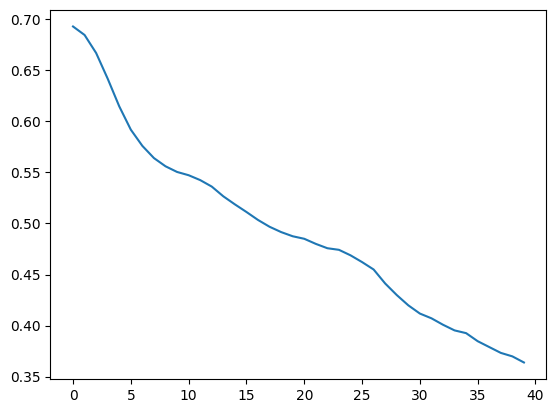

In [180]:
plt.plot(his.history['loss'])

In [190]:
predict = model.predict(X_test)

42/42 [==============================] - 0s 2ms/step


In [191]:
predict

array([[0.06524206],
       [0.97750825],
       [0.993515  ],
       ...,
       [0.96309835],
       [0.99685776],
       [0.4264072 ]], dtype=float32)

In [192]:
predict = np.where(predict >= 0.5, 1, 0)

In [193]:
predict = predict.reshape(predict.shape[0])

In [194]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       635
           1       0.92      0.88      0.90       685

    accuracy                           0.90      1320
   macro avg       0.90      0.90      0.90      1320
weighted avg       0.90      0.90      0.90      1320

